# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [7]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

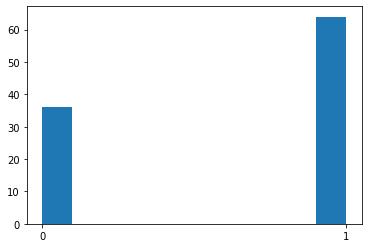

In [41]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

# your code here

p = 0.6
P = stats.bernoulli.rvs(p, size=100)
plt.hist(P, align='mid')
plt.xticks([0,1])
plt.show()

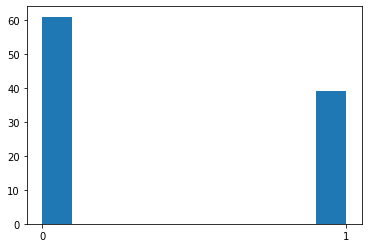

In [42]:
q = 0.4
Q = stats.bernoulli.rvs(q, size=100)
plt.hist(Q, align='mid')
plt.xticks([0,1])
plt.show()

Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [45]:
# your code here
# What is the probability that the first 5 fruits are all apples?
print('The probability of the first 5 being apples is:', 0.6**5)

# What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?
print('The probability of the first 5 being apples followed by 15 oranges is:', (0.6**5)*(0.4**15))


The probability of the first 5 being apples is: 0.07775999999999998
The probability of the first 5 being apples followed by 15 oranges is: 8.349416423424006e-08


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [49]:
# Solution

n=20 
p = 0.6
binomial = stats.binom(n,p) 
# point mass function, probability of having one given value
print('pmf:', binomial.pmf(5)) 

pmf: 0.0012944935222876511


pmf: 0.0012944935222876511


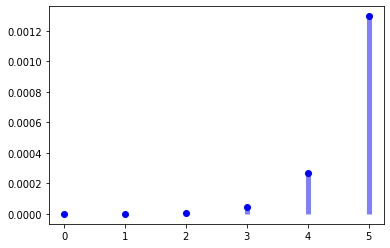

In [85]:

n=20 # 20 trials
p=0.6 # probability per trial (as in bernoulli)
binomial = stats.binom(n,p) # creates binomial distribution
# point mass function, probability of having one given value
print('pmf:', binomial.pmf(5)) 
x = np.arange(0,6)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.show()

pmf: 0.0012944935222876511


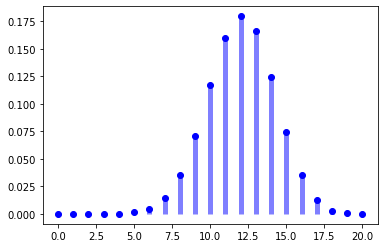

In [87]:
n=20 # 20 trials
p=0.6 # probability per trial (as in bernoulli)
binomial = stats.binom(n,p) # creates binomial distribution
# point mass function, probability of having one given value
print('pmf:', binomial.pmf(5)) 
x = np.arange(0,21) # to see 20 in the graph
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.show()

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [50]:
# your code here

n=20 
p = 0.6
binomial = stats.binom(n,p) 
print('cdf:', binomial.cdf(4)) 

cdf: 0.0003170311211686301


cdf: 0.001611524643456288


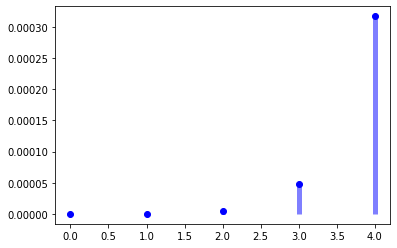

In [83]:
n=20 
p = 0.6
binomial = stats.binom(n,p)
# cumulative distribution function, probability of having up to one given value 
# (sum of probs of all values up to a given value)
print('cdf:', binomial.cdf(5)) 
x = np.arange(0,5)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.binom.cdf(x, n, p), 'bo')
ax.vlines(x, 0, stats.binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.show()


**Plot the PDF (probability distribution function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

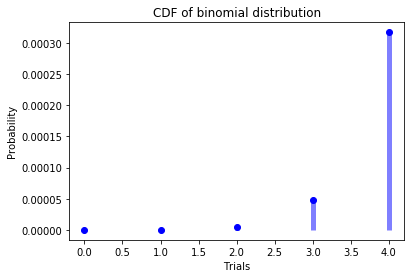

In [86]:
# your code here
# Please label the axes and give a title to the plot

n=20 
p = 0.6
binomial = stats.binom(n,p) 
# cumulative distribution function, probability of having up to one given value 
# (sum of probs of all values up to a given value)print('cdf:', binomial.cdf(5)) 
x = np.arange(0,5)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.binom.cdf(x, n, p), 'bo')
ax.vlines(x, 0, stats.binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlabel('Trials')
plt.ylabel('Probability')
plt.title('CDF of binomial distribution')
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [63]:
# your code here

#Felipe Barrocas
# Poisson = I know it rains one in 7 days and I want to know if it will rain
# twice in 30 days
#Two inputs for the formula: the frequency/times I want the event to happen
#(in this case 2) and the timespan I want it to happen in (30 days)
# another example: I know a computer breaks in 10 yrs, what is the probability
# that it breaks in 5 yrs?
# 1/10 probability of breaking,1 time,5 would be the inputs into the function

average_goals = 2.3
n_goals = 5

# PMF Poisson
f = ( (5*2) * (math.exp(-5) ) ) / math.factorial(2)
f


0.03874319524474144

**Draw a Poisson probability distribution plot for the number of goals to be between 0 to 10.**

5.0


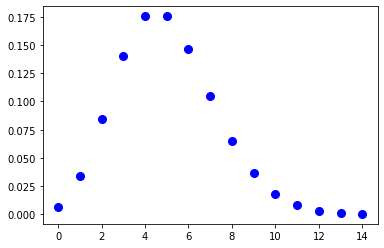

In [90]:
# your code here
# Please label the axes and give a title to the plot 

# mu is the expectation
mu = 5
mean, var, skew, kurt = stats.poisson.stats(mu, moments='mvsk')
print(mean)

x = np.arange(stats.poisson.ppf(0.00001, mu), stats.poisson.ppf(0.9999, mu))
plt.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.show()